In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("C:/Users/asus/OneDrive/Desktop/covid_19_clean_complete.csv")
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [3]:
# Renaming the columns 
data.rename(columns = {"Country/Region": "Country"}, inplace = True)

In [4]:
data['Active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']

In [5]:
recent_day = data[data['Date'] == '2020-07-27']
recent_day

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [6]:
world = recent_day.groupby('Country')['Confirmed','Active','Deaths','Recovered'].sum().reset_index()
world

C:\Users\asus\AppData\Local\Temp\ipykernel_9468\3476171931.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world = recent_day.groupby('Country')['Confirmed','Active','Deaths','Recovered'].sum().reset_index()


,Country,Confirmed,Active,Deaths,Recovered
0,Afghanistan,36263,9796,1269,25198
1,Albania,4880,1991,144,2745
2,Algeria,27973,7973,1163,18837
3,Andorra,907,52,52,803
4,Angola,950,667,41,242
...,...,...,...,...,...
182,West Bank and Gaza,10621,6791,78,3752
183,Western Sahara,10,1,1,8
184,Yemen,1691,375,483,833
185,Zambia,4552,1597,140,2815


In [7]:
figure = px.choropleth(world, locations = "Country",
                        locationmode="Country names", color="Active",
                        hover_name = "Country", range_color=[1,10000],
                        color_continuous_scale = "blues",
                        title = " Countries with Active cases")

figure.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'locationmode' property of choropleth
        Received value: 'Country names'

    The 'locationmode' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['ISO-3', 'USA-states', 'country names', 'geojson-id']

In [8]:
data.groupby("Date")["Date","Confirmed"].sum().reset_index()

C:\Users\asus\AppData\Local\Temp\ipykernel_9468\176528139.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby("Date")["Date","Confirmed"].sum().reset_index()
C:\Users\asus\AppData\Local\Temp\ipykernel_9468\176528139.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Date")["Date","Confirmed"].sum().reset_index()


,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


# TREND OF HOW COVID SPREAD

C:\Users\asus\AppData\Local\Temp\ipykernel_9468\56539773.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_cases = data.groupby("Date")["Date","Confirmed","Recovered"].sum().reset_index()
C:\Users\asus\AppData\Local\Temp\ipykernel_9468\56539773.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_cases = data.groupby("Date")["Date","Confirmed","Recovered"].sum().reset_index()


[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

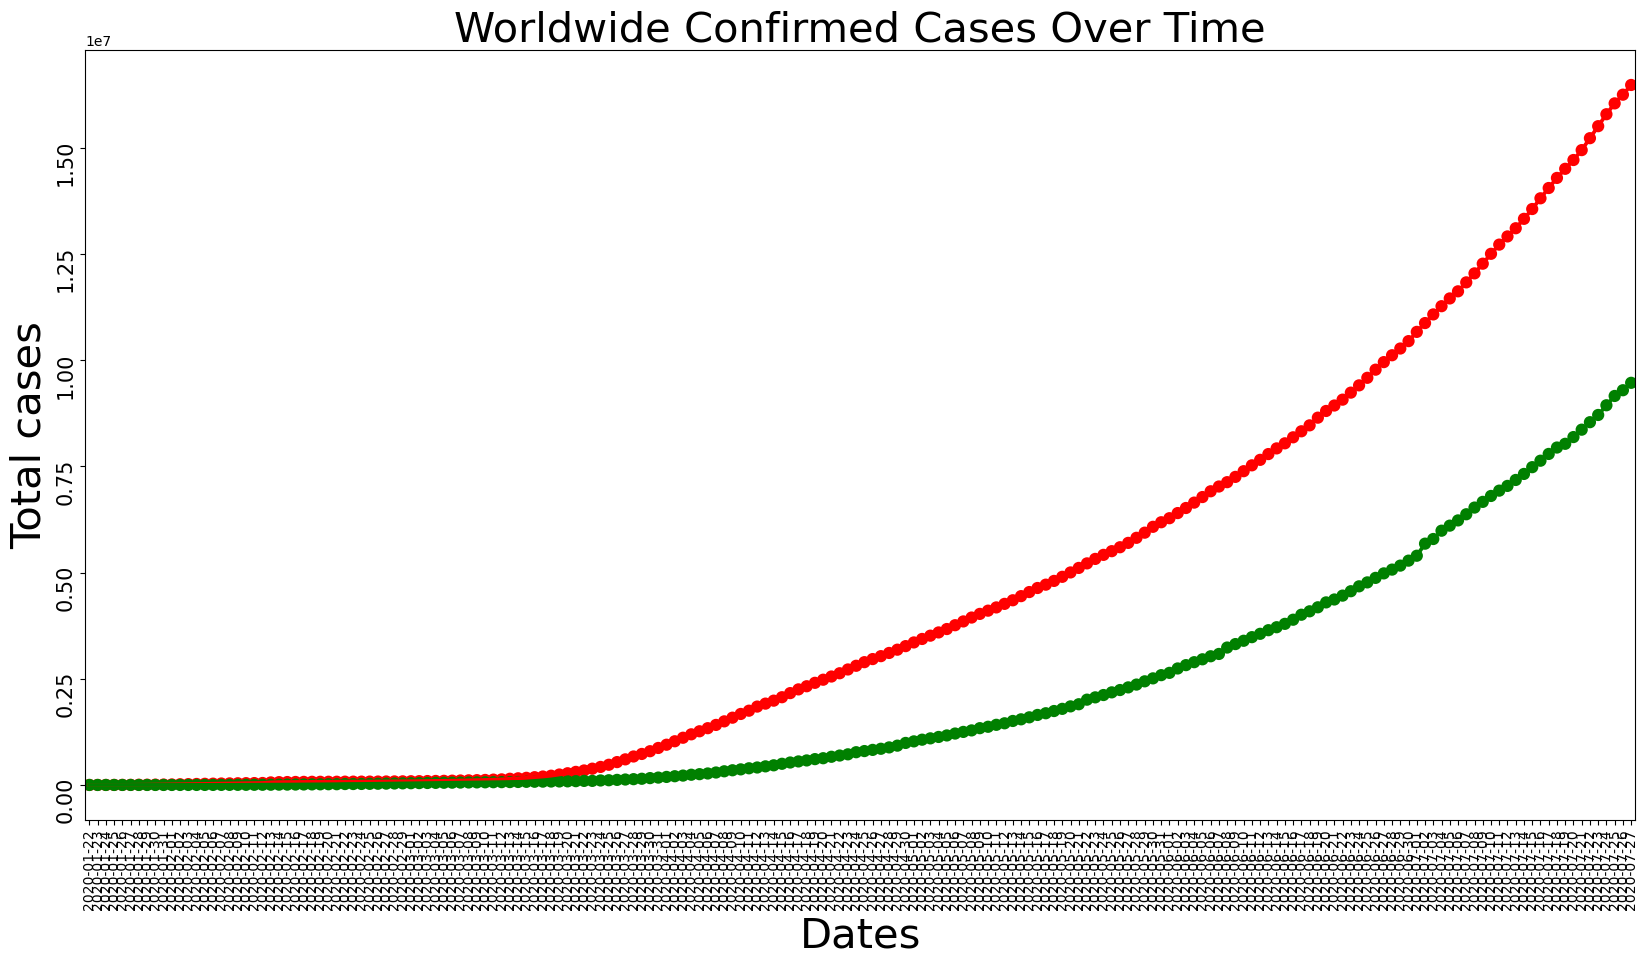

In [9]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=90, fontsize=15)
plt.xlabel("Dates", fontsize=30)
plt.ylabel("Total cases", fontsize=30)
plt.title("Worldwide Confirmed Cases Over Time", fontsize=30)
total_cases = data.groupby("Date")["Date","Confirmed","Recovered"].sum().reset_index()

ax = sns.pointplot(x = total_cases.Date, y = total_cases.Confirmed, color = 'r')
ax = sns.pointplot(x = total_cases.Date, y = total_cases.Recovered, color = 'g')
ax.set(xlabel = "Dates", ylabel= "Total cases")

# Top 10 Countries Having Active Cases

In [10]:
top_actives = recent_day.groupby("Country")["Active"].sum().sort_values(ascending=False).head(10).reset_index()
top_actives

,Country,Active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

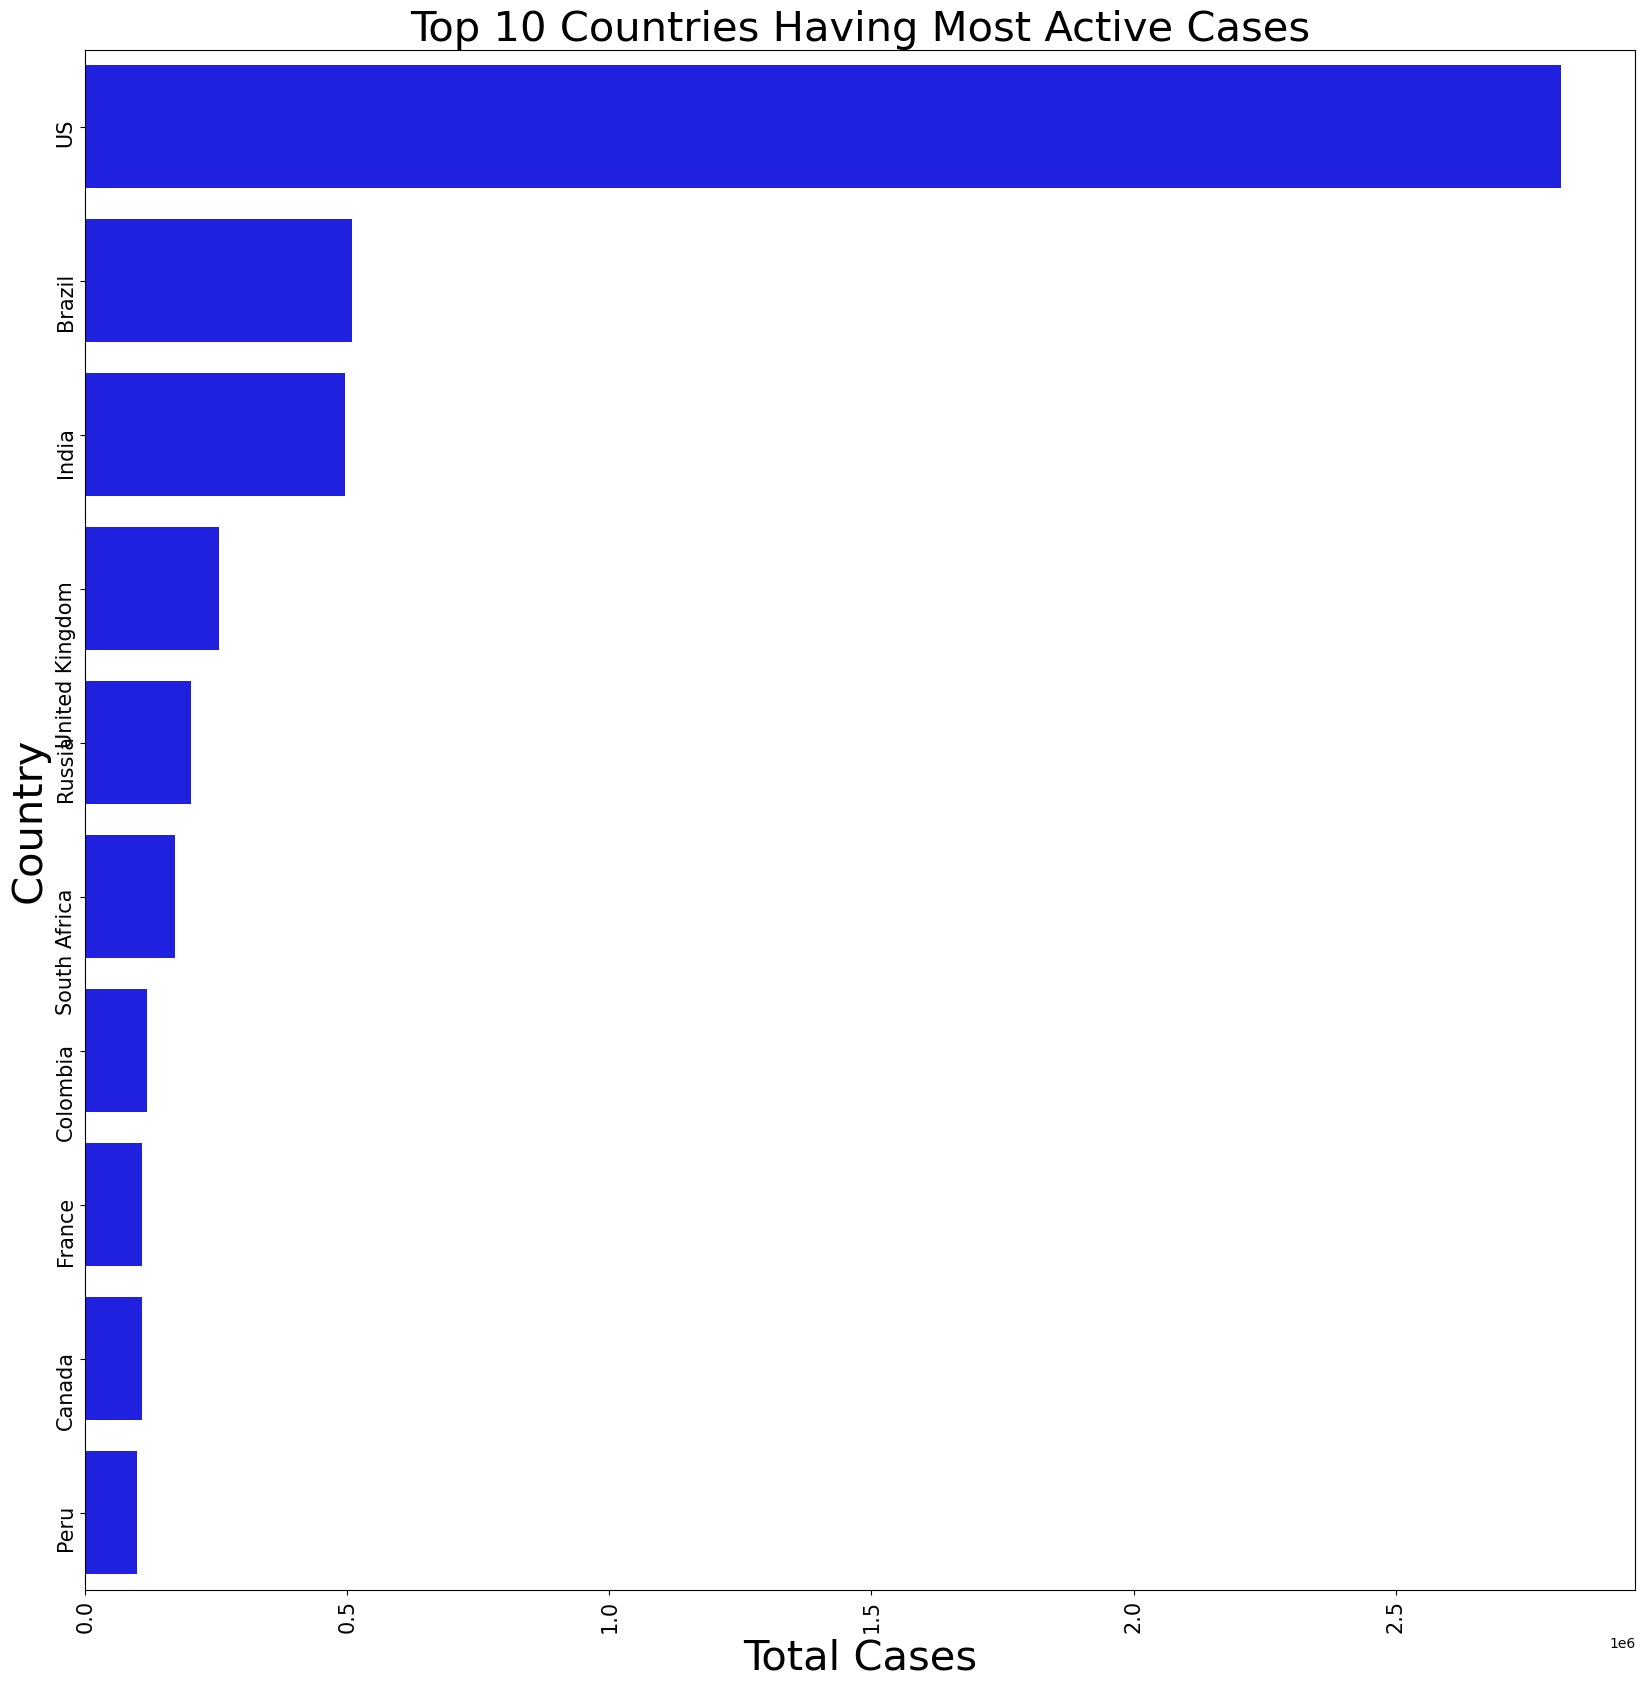

In [11]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=90, fontsize=15)
plt.xlabel("Country", fontsize=30)
plt.ylabel("Total cases", fontsize=30)
plt.title("Top 10 Countries Having Most Active Cases", fontsize=30)

ax = sns.barplot(x = top_actives.Active, y = top_actives.Country, color = 'b')
ax.set(xlabel = "Total Cases", ylabel= "Country")

In [12]:
US = data[data.Country == "US"]
US = US.groupby('Date')['Confirmed','Active','Deaths','Recovered'].sum().reset_index()
US

C:\Users\asus\AppData\Local\Temp\ipykernel_9468\3534514136.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  US = US.groupby('Date')['Confirmed','Active','Deaths','Recovered'].sum().reset_index()


,Date,Confirmed,Active,Deaths,Recovered
0,2020-01-22,1,1,0,0
1,2020-01-23,1,1,0,0
2,2020-01-24,2,2,0,0
3,2020-01-25,2,2,0,0
4,2020-01-26,5,5,0,0
...,...,...,...,...,...
183,2020-07-23,4038816,2661117,144430,1233269
184,2020-07-24,4112531,2705347,145560,1261624
185,2020-07-25,4178970,2753091,146465,1279414
186,2020-07-26,4233923,2789125,146935,1297863


In [13]:
Russia = data[data.Country == "Russia"]
Russia = Russia.groupby(by='Date')['Confirmed','Active','Deaths','Recovered'].sum().reset_index()
Russia

C:\Users\asus\AppData\Local\Temp\ipykernel_9468\1192181556.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Russia = Russia.groupby(by='Date')['Confirmed','Active','Deaths','Recovered'].sum().reset_index()


,Date,Confirmed,Active,Deaths,Recovered
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,793720,201552,12873,579295
184,2020-07-24,799499,198745,13026,587728
185,2020-07-25,805332,196096,13172,596064
186,2020-07-26,811073,198652,13249,599172


In [14]:
UK = data[data.Country == "United Kingdom"]
UK = UK.groupby(by='Date')['Confirmed','Active','Deaths','Recovered'].sum().reset_index()
UK

C:\Users\asus\AppData\Local\Temp\ipykernel_9468\952208522.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  UK = UK.groupby(by='Date')['Confirmed','Active','Deaths','Recovered'].sum().reset_index()


,Date,Confirmed,Active,Deaths,Recovered
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,298731,251667,45639,1425
184,2020-07-24,299500,252313,45762,1425
185,2020-07-25,300270,253020,45823,1427
186,2020-07-26,301020,253749,45837,1434


In [15]:
India = data[data.Country == "India"]
India = India.groupby(by='Date')['Confirmed','Active','Deaths','Recovered'].sum().reset_index()
India

C:\Users\asus\AppData\Local\Temp\ipykernel_9468\3469957341.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  India = India.groupby(by='Date')['Confirmed','Active','Deaths','Recovered'].sum().reset_index()


,Date,Confirmed,Active,Deaths,Recovered
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,440298,30601,817209
184,2020-07-24,1337024,456234,31358,849432
185,2020-07-25,1385635,468002,32060,885573
186,2020-07-26,1435616,485277,32771,917568


In [16]:
Brazil = data[data.Country == "Brazil"]
Brazil = Brazil.groupby(by='Date')['Confirmed','Active','Deaths','Recovered'].sum().reset_index()
Brazil

C:\Users\asus\AppData\Local\Temp\ipykernel_9468\860984348.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Brazil = Brazil.groupby(by='Date')['Confirmed','Active','Deaths','Recovered'].sum().reset_index()


,Date,Confirmed,Active,Deaths,Recovered
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,2287475,583080,84082,1620313
184,2020-07-24,2343366,564914,85238,1693214
185,2020-07-25,2394513,522705,86449,1785359
186,2020-07-26,2419091,519174,87004,1812913


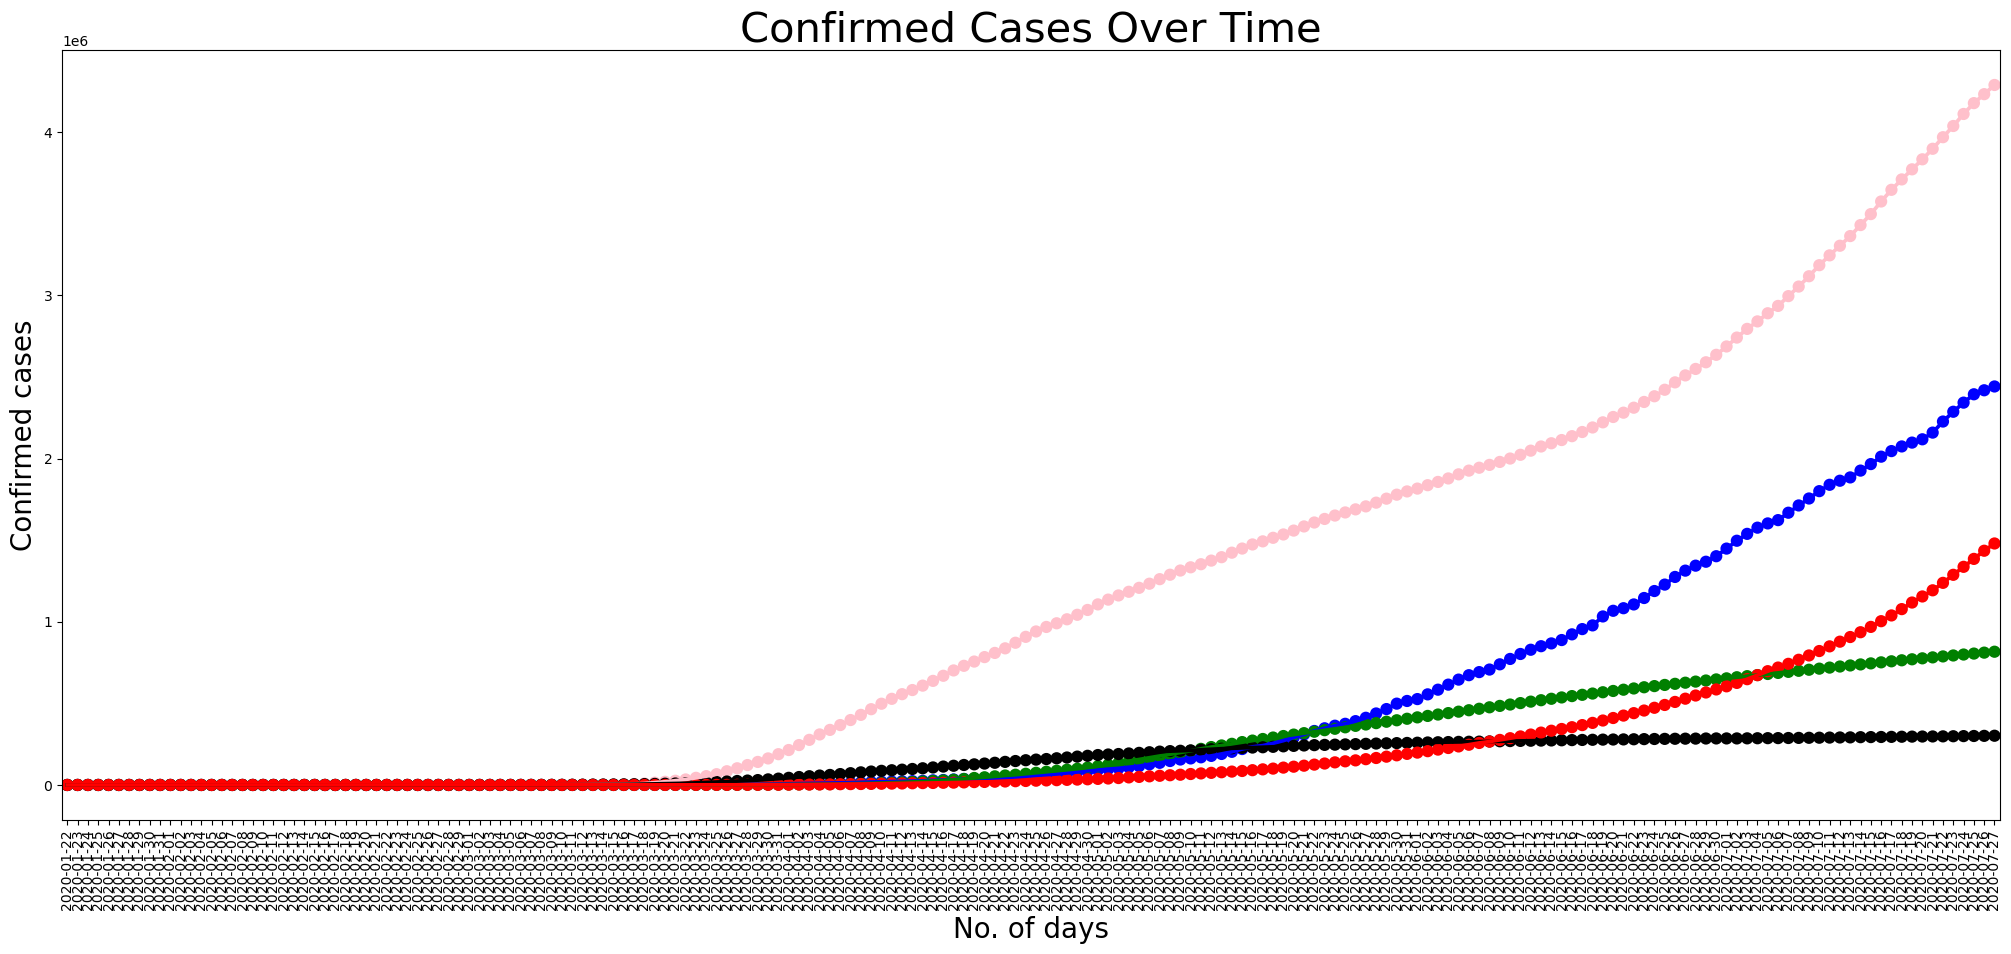

In [17]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.pointplot(x = Brazil.Date, y=Brazil.Confirmed, color='Blue')
sns.pointplot(x = US.Date, y=US.Confirmed, color='Pink')
sns.pointplot(x = Russia.Date, y=Russia.Confirmed, color='Green')
sns.pointplot(x = UK.Date, y=UK.Confirmed, color='Black')
sns.pointplot(x = India.Date, y=India.Confirmed, color='Red')
plt.xlabel("No. of days", fontsize=20)
plt.ylabel("Confirmed cases", fontsize=20)
plt.title("Confirmed Cases Over Time", fontsize=30)
plt.show()

# Forecasting With FB Prophet Model

In [18]:
!pip install prophet

In [19]:
from prophet import Prophet

In [20]:
confirmed = data.groupby("Date").sum()["Confirmed"].reset_index()
confirmed

C:\Users\asus\AppData\Local\Temp\ipykernel_9468\594897769.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  confirmed = data.groupby("Date").sum()["Confirmed"].reset_index()


,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [21]:
Recovered = data.groupby("Date").sum()["Recovered"].reset_index()
Active = data.groupby("Date").sum()["Active"].reset_index()
Deaths = data.groupby("Date").sum()["Deaths"].reset_index()

C:\Users\asus\AppData\Local\Temp\ipykernel_9468\957387772.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Recovered = data.groupby("Date").sum()["Recovered"].reset_index()
C:\Users\asus\AppData\Local\Temp\ipykernel_9468\957387772.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Active = data.groupby("Date").sum()["Active"].reset_index()
C:\Users\asus\AppData\Local\Temp\ipykernel_9468\957387772.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shou

In [22]:
Recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [23]:
Active

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [24]:
Deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [25]:
# LET'S DO FORECASTING FOR THE CONFIRMED CASES

# For building a forecasting model using fbProphet library
# There should be only 2 columns passed
# The column names should always be --> 'ds' , 'y'
# ds(date stamp), y(target)

In [26]:
confirmed.rename(columns = {"Date":"ds", "Confirmed":"y"}, inplace=True)
confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [27]:
model = Prophet(interval_width=0.95)
model.fit(confirmed)

15:05:59 - cmdstanpy - INFO - Chain [1] start processing
15:05:59 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
future = model.make_future_dataframe(periods=7)
future.tail(10)

,ds
185,2020-07-25
186,2020-07-26
187,2020-07-27
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [29]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632401e+07,1.616803e+07,1.649351e+07
189,2020-07-29,1.653405e+07,1.638303e+07,1.670932e+07
190,2020-07-30,1.674820e+07,1.658602e+07,1.690717e+07
191,2020-07-31,1.696362e+07,1.680434e+07,1.712036e+07
192,2020-08-01,1.717143e+07,1.700358e+07,1.735489e+07
193,2020-08-02,1.736922e+07,1.719766e+07,1.753788e+07
194,2020-08-03,1.756410e+07,1.739223e+07,1.775253e+07


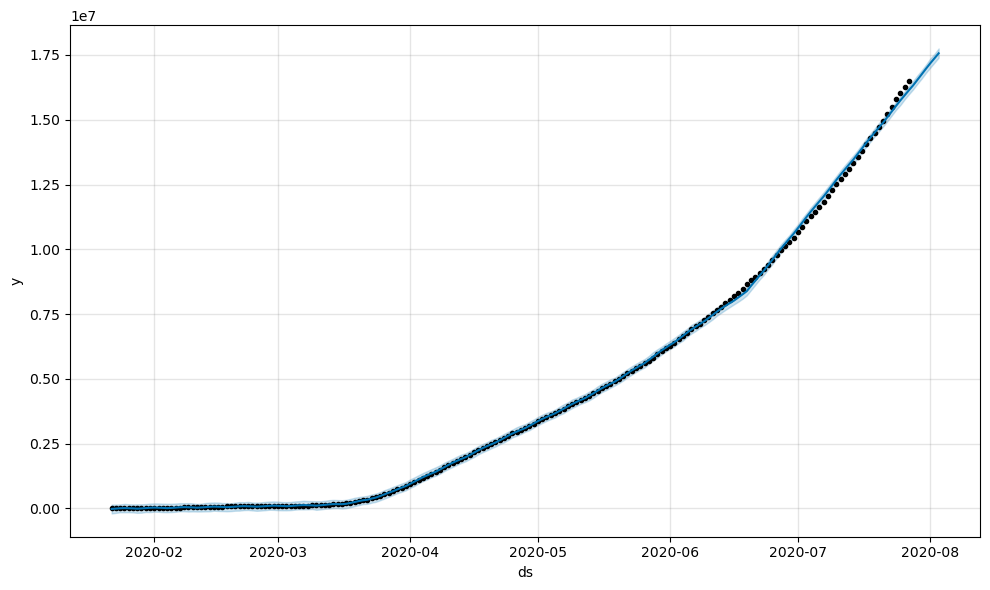

In [31]:
forecast_plot = model.plot(forecast)

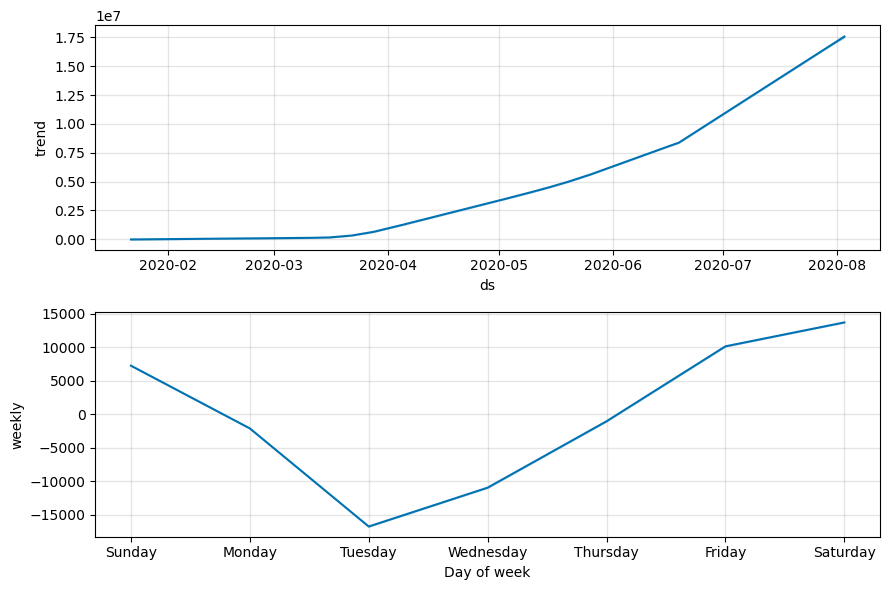

In [32]:
forecast_plot1 = model.plot_components(forecast)